## 281 Computational - HW1 
### Facundo Pernigotti

### Problem 1: Cake-eating Problem

In the base cake-eating problem the agent has to solve

$$\max \sum_t \beta^t ln(c_t)$$ subject to $$x_{t+1}=x_t-c_t$$

where the size of the cake $x_t$ is the state variable of the problem, consumption $c_t$ is the control variable, and $\beta$ is the discount rate. The problem can be written in the recursive form as:

$V(x)=max\{ c + \beta V(x')\} $ s.t. $x'=c-x$

Below we find the values for $V(x)$ using value function iteration:

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar

#CakeEating contains the problem of the agent
class CakeEating:

    def __init__(self, beta, delta , x_grid_min=1e-7, x_grid_max=1, x_grid_size=100):
        self.beta = beta
        self.delta = delta
        self.x_grid = np.linspace(x_grid_min, x_grid_max, x_grid_size)

    def u(self, c):
            return np.log(c)
 
    def utility_values(self, c, x, v_array):
        beta = self.beta
        delta = self.delta
        v = lambda x: np.interp(x, self.x_grid, v_array)
        return self.u(c) + beta * v( delta * x - c)

def maximize(g, a, b, args):
    objective = lambda x: -g(x, *args)
    result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    return result.x, -result.fun

#Define the Bellman Operator
def T(v, ce):
    v_new = np.empty_like(v)
    consumption = np.empty_like(v)
    for i, x in enumerate(ce.x_grid):
        v_new[i] = maximize(ce.utility_values, 1e-10, x, (x, v))[1]
        consumption[i] = maximize(ce.utility_values, 1e-10, x, (x, v))[0]
    return consumption, v_new 

#Define function for value function iteration
def VFI(ce, tol, max_iter=80000, verbose=True, print_skip=1000):
    #v = np.linspace(0, 1, ce.x_grid)
    #v = np.zeros(len(ce.x_grid))
    v = np.log(ce.x_grid)
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v, ce)[1]
        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new
        consumption= T(v, ce)[0]
        
    if error > tol:
        print("Failed to converge!")
    elif verbose:
        print(f"\nConverged in {i} iterations")

    return consumption, v_new




Converged in 137 iterations


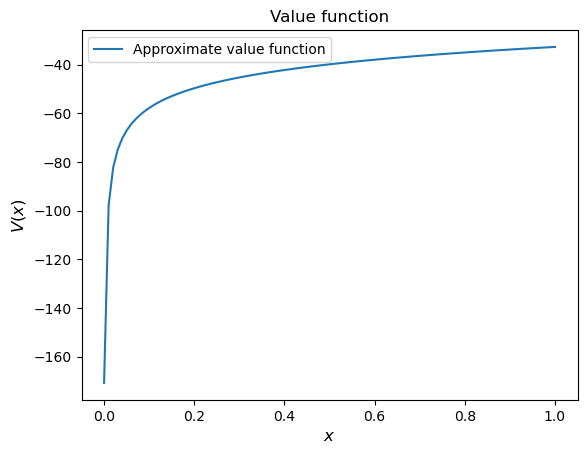

In [2]:
import matplotlib.pyplot as plt

#Plotting the Value Function
ce = (CakeEating(beta=0.9, delta=1))
v = VFI(ce, tol=1e-5)[1]
fig, ax = plt.subplots()

x_grid = ce.x_grid
ax.plot(x_grid, v, label='Approximate value function')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.set_title('Value function')
ax.legend()
plt.show()

Below we plot the consumption over time assuming that we start with a cake of size 1 and the discount factor $\beta=0.9$. Note that this is not the consumption policy function, but rather I am describing the profile of consumption for a person. 

In [3]:
#Make the consumption path over time:
from scipy.interpolate import interp1d
consumption = VFI(ce, tol=1e-5)[0]

# Initial cake size and savings
initial_cake_size = x_grid[-1] #This takes the initial cake as the largest possible (1)
initial_consumption = consumption[-1]
initial_savings= x_grid[-1] - consumption[-1]

# Initialize arrays to store cake size, savings, and consumption for each period
cake_sizes = [initial_cake_size]
savings_series = [initial_savings]
consumption_series = [initial_cake_size - initial_savings]

# Iterate over 100 periods
for i in range(1, 500):
    # Interpolate savings to estimate consumption for current cake size
    cons_interp = interp1d(x_grid, consumption, kind='linear')
    #estimated_consumption = cake_sizes[i-1] - savings_interp(cake_sizes[i-1])
    start_cake=savings_series[i-1]
    estimated_consumption = cons_interp(start_cake)
    estimated_savings= cake_sizes[i-1] - cons_interp(cake_sizes[i-1])
    
    # Save the estimated consumption and update the cake size
    cake_sizes.append(start_cake)
    savings_series.append(estimated_savings)
    consumption_series.append(estimated_consumption)



Converged in 137 iterations


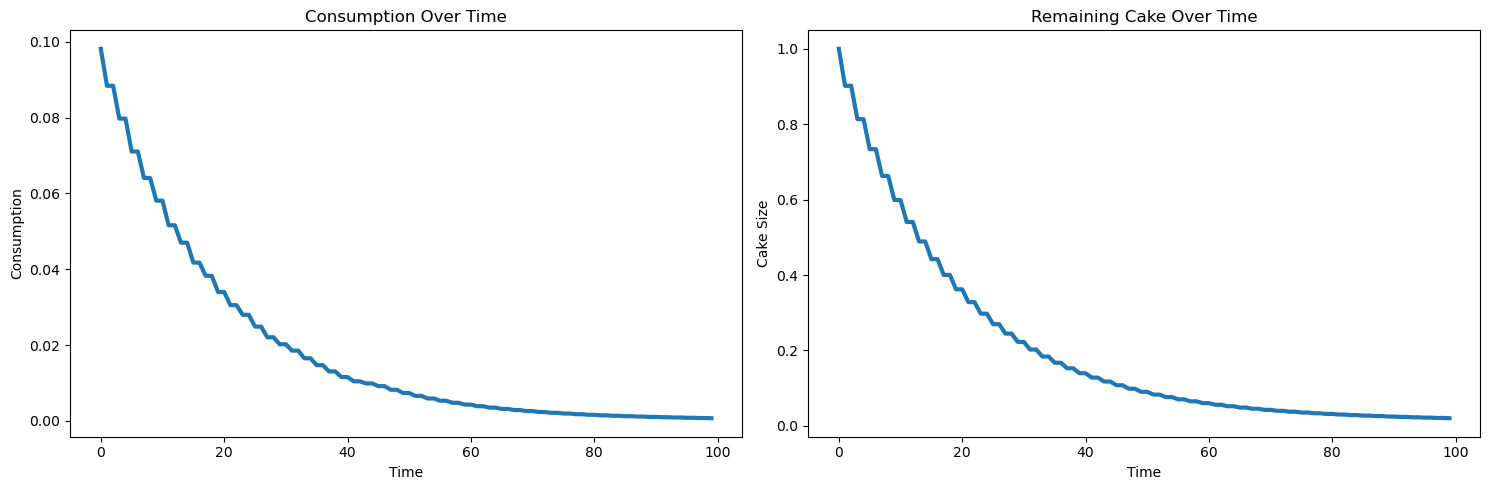

In [4]:
  
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(100), consumption_series[:100], linewidth=3)
axs[0].set_xlabel('Time') 
axs[0].set_ylabel('Consumption') 
axs[0].set_title('Consumption Over Time') 

axs[1].plot(range(100), cake_sizes[:100], linewidth=3)
axs[1].set_xlabel('Time') 
axs[1].set_ylabel('Cake Size') 
axs[1].set_title('Remaining Cake Over Time') 

plt.tight_layout()
plt.show()
 


Below we plot the profile of consumption for $\beta=0.9$ (in blue) and $\beta=0.9999$ (in orange)

In [5]:
#Make the consumption path over time:
ce2 = (CakeEating(beta=0.999, delta=1)) #I use .999 instead of .9999 because it takes too long to converge
consumption2 = VFI(ce2, tol=1e-2)[0]

# Initial cake size and savings
initial_cake_size2 = x_grid[-1]
initial_consumption2 = consumption2[-1]
initial_savings2= x_grid[-1] - consumption2[-1]

# Initialize arrays to store cake size, savings, and consumption for each period
cake_sizes2 = [initial_cake_size2]
savings_series2 = [initial_savings2]
consumption_series2 = [initial_cake_size2 - initial_savings2]

# Iterate over 100 periods
for i in range(1, 100):
    # Interpolate savings to estimate consumption for current cake size
    cons_interp = interp1d(x_grid, consumption2, kind='linear')
    #estimated_consumption = cake_sizes[i-1] - savings_interp(cake_sizes[i-1])
    start_cake2=savings_series2[i-1]
    estimated_consumption2 = cons_interp(start_cake2)
    estimated_savings2= cake_sizes2[i-1] - cons_interp(cake_sizes2[i-1])
    
    # Save the estimated consumption and update the cake size
    cake_sizes2.append(start_cake2)
    savings_series2.append(estimated_savings2)
    consumption_series2.append(estimated_consumption2)

Error at iteration 1000 is 6.280187974773071.
Error at iteration 2000 is 2.3091963850256434.
Error at iteration 3000 is 0.8490809456707211.
Error at iteration 4000 is 0.31220317898259964.
Error at iteration 5000 is 0.1147956805107242.
Error at iteration 6000 is 0.04220984650601167.
Error at iteration 7000 is 0.015520367440331029.

Converged in 7440 iterations


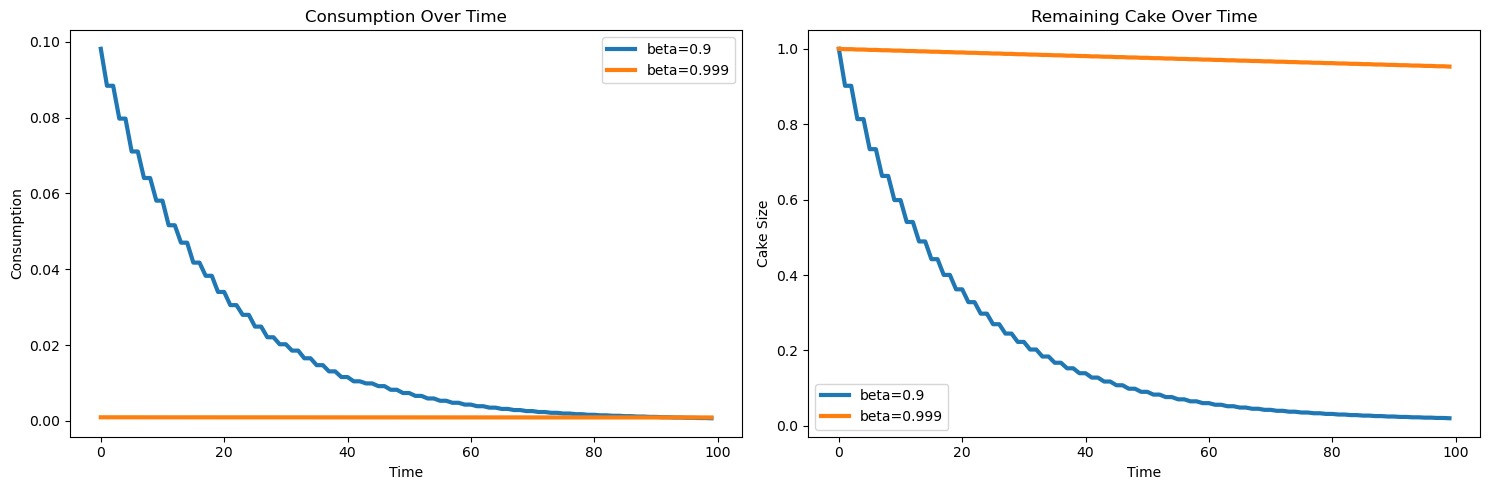

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(100), consumption_series[:100], linewidth=3, label='beta=0.9')
axs[0].plot(range(100), consumption_series2, linewidth=3, label='beta=0.999')
axs[0].set_xlabel('Time')  
axs[0].set_ylabel('Consumption')  
axs[0].set_title('Consumption Over Time')  
axs[0].legend()

axs[1].plot(range(100), cake_sizes[:100], linewidth=3, label='beta=0.9')
axs[1].plot(range(100), cake_sizes2, linewidth=3, label='beta=0.999')
axs[1].set_xlabel('Time')  
axs[1].set_ylabel('Cake Size') 
axs[1].set_title('Remaining Cake Over Time') 
axs[1].legend()

plt.tight_layout()
plt.show()


We can see that now that as the person gets more patient, they smooth their consumption more over time to make the cake last longer. 

The consumption profile when the cake depreciates over time is ploted in orange below.


In [7]:
#Make the consumption path over time:
ce3 = (CakeEating(beta=0.9, delta=0.9))
consumption3 = VFI(ce3, tol=1e-5)[0]

# Initial cake size and savings
initial_cake_size3 = x_grid[-1]
initial_consumption3 = consumption3[-1]
initial_savings3= x_grid[-1] - consumption3[-1]

# Initialize arrays to store cake size, savings, and consumption for each period
cake_sizes3 = [initial_cake_size3]
savings_series3 = [initial_savings3]
consumption_series3 = [initial_cake_size3 - initial_savings3]

# Iterate over 100 periods
for i in range(1, 100):
    # Interpolate savings to estimate consumption for current cake size
    cons_interp = interp1d(x_grid, consumption3, kind='linear')
    #estimated_consumption = cake_sizes[i-1] - savings_interp(cake_sizes[i-1])
    start_cake3=savings_series3[i-1]*0.9
    estimated_consumption3 = cons_interp(start_cake3)
    estimated_savings3= cake_sizes3[i-1] - cons_interp(cake_sizes3[i-1])
    
    # Save the estimated consumption and update the cake size
    cake_sizes3.append(start_cake3)
    savings_series3.append(estimated_savings3)
    consumption_series3.append(estimated_consumption3)


Converged in 137 iterations


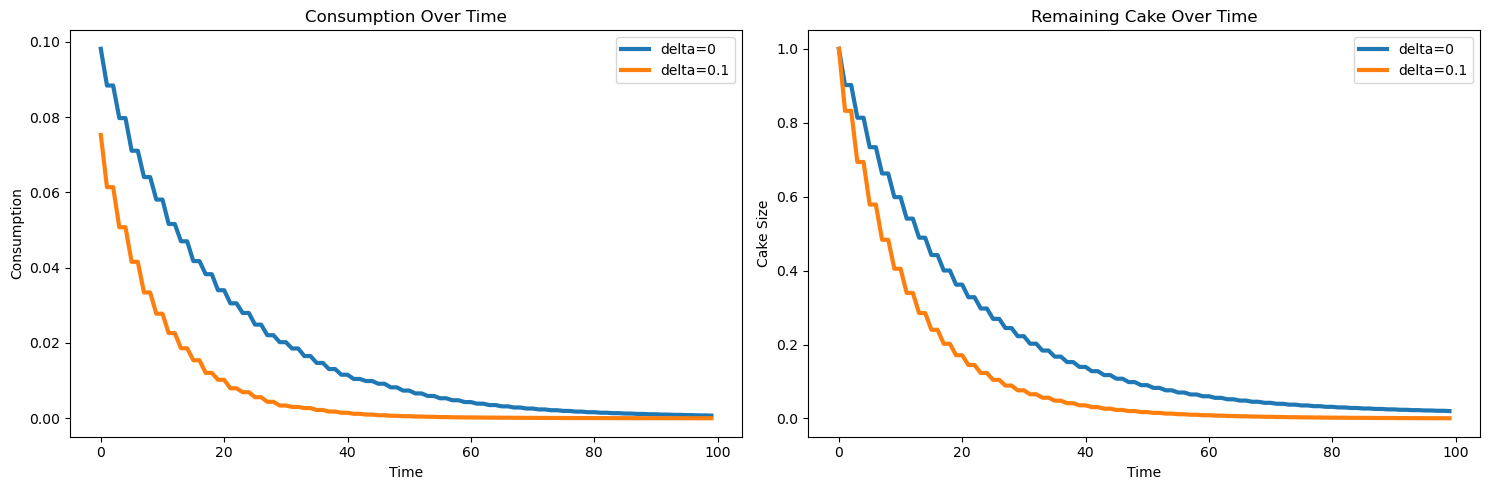

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(100), consumption_series[:100], linewidth=3, label='delta=0')
axs[0].plot(range(100), consumption_series3, linewidth=3, label='delta=0.1')
axs[0].set_xlabel('Time')  
axs[0].set_ylabel('Consumption')  
axs[0].set_title('Consumption Over Time')  
axs[0].legend()

axs[1].plot(range(100), cake_sizes[:100], linewidth=3, label='delta=0')
axs[1].plot(range(100), cake_sizes3, linewidth=3, label='delta=0.1')
axs[1].set_xlabel('Time')  
axs[1].set_ylabel('Cake Size') 
axs[1].set_title('Remaining Cake Over Time') 
axs[1].legend()

plt.tight_layout()
plt.show()

Interestingly, consumption is lower when there is some depreciation. On one hand, the agent would like to consume more today to aviod the cake from depreciating. On the other hand, the agent has to save more cake for tomorrow in order to smooth consumption. As we can see from the graph, the second effect seems to dominate. 

## Problem 2: Finite-horizon Cake-eating Problem



As before, the Bellman equation is

$V(x)=max\{ c + \beta V(x')\}$ s.t. $x'=c-x$

where the size of the cake $x$ is the state variable of the problem, consumption $c$ is the control variable, and $\beta$ is the discount rate. 
                        
In the last period, we can think of the Bellman equation being the same with the budget constraint changing into  $x'= 0$. 
This implies that the optimal solution for that period will be to eat all the remaining of the cake. 

In [9]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

#CakeEating contains the problem of the agent
class CakeEating:

    def __init__(self, beta, delta , x_grid_min=1e-7, x_grid_max=1, x_grid_size=100):
        self.beta = beta
        self.delta = delta
        self.x_grid = np.linspace(x_grid_min, x_grid_max, x_grid_size)

    def u(self, c):
            return np.log(c)
 
    def utility_values(self, c, x, v_array):
        beta = self.beta
        delta = self.delta
        v = lambda x: np.interp(x, self.x_grid, v_array)
        return self.u(c) + beta * v( delta * x - c)

def maximize(g, a, b, args):
    objective = lambda x: -g(x, *args)
    result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    return result.x, -result.fun

#Define the Bellman Operator
def T(v, ce):
    v_new = np.empty_like(v)
    consumption = np.empty_like(v)
    for i, x in enumerate(ce.x_grid):
        v_new[i] = maximize(ce.utility_values, 1e-10, x, (x, v))[1]
        consumption[i] = maximize(ce.utility_values, 1e-10, x, (x, v))[0]
    return consumption, v_new 

def VFI_finite(ce, maxT):
    v = np.log(ce.x_grid)
    v_matrix = v[np.newaxis, :] * np.ones((maxT, 1))
    consumption = ce.x_grid
    consumption_matrix = consumption[np.newaxis, :] * np.ones((maxT, 1))  
    i = 1
    while i < maxT: 
        t_o = maxT-i
        t_n = maxT-1-i
        v_matrix[t_n,0:] = T(v_matrix[t_o,0:], ce)[1]
        consumption_matrix[t_n,0:] = T(v_matrix[t_o,0:], ce)[0]   
        i += 1    
    return consumption_matrix, v_matrix

#To plot consumption profile, we need to select the correct path inside of c50
def consumptionpath(maxT):
    cons_matrix=VFI_finite(ce,maxT)[0]

    # Initial cake size and savings
    initial_cake_size = 1 #This takes the initial cake as the largest possible (1)
    initial_consumption = cons_matrix[0,-1]
    initial_savings= initial_cake_size-initial_consumption

    # Initialize arrays to store cake size, savings, and consumption for each period
    cake_sizes = [initial_cake_size]
    savings_series = [initial_savings]
    consumption_series = [initial_consumption]

    # Iterate over T periods
    for i in range(1, maxT):
        # Interpolate savings to estimate consumption for current cake size
        cons_interp = interp1d(x_grid, cons_matrix[i,0:], kind='linear')
        start_cake=savings_series[i-1]
        estimated_consumption = cons_interp(start_cake)
        estimated_savings= np.maximum(start_cake - estimated_consumption, 1e-7)

        # Save the estimated consumption and update the cake size
        cake_sizes.append(start_cake)
        savings_series.append(estimated_savings)
        consumption_series.append(estimated_consumption)

    total_consumption = np.sum(consumption_series)

    print("Total consumption when T="+str(maxT)+":", total_consumption)

    return consumption_series


Total consumption when T=50: 0.9999999999999996
Total consumption when T=500: 1.0
Error at iteration 1000 is 0.0007377365107004152.

Converged in 1428 iterations


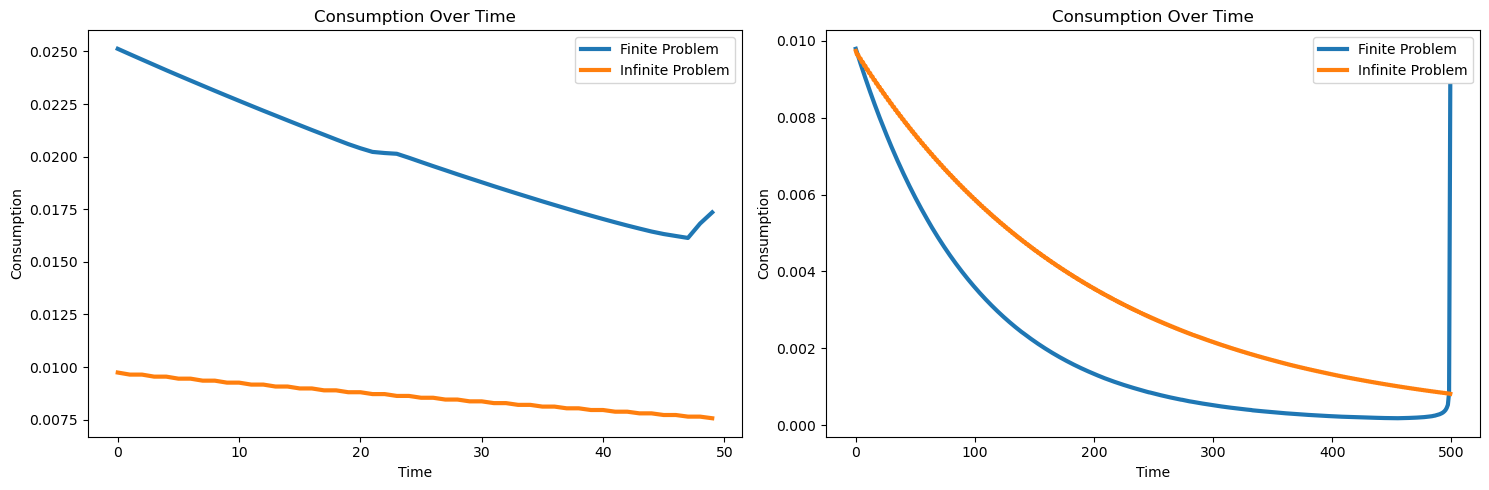

In [10]:
ce=CakeEating(beta=0.99, delta=1)
x_grid = ce.x_grid

#Now we use the function to generate the series of consumption for T=50 and T=500
consumption_series50=consumptionpath(maxT=50)
consumption_series500=consumptionpath(maxT=500)

#I also get the infinite time consumption series to compare: (I need VFI from previous section)
consumption = VFI(ce, tol=1e-5)[0]

# Initial cake size and savings
initial_cake_size = x_grid[-1] #This takes the initial cake as the largest possible (1)
initial_consumption = consumption[-1]
initial_savings= x_grid[-1] - consumption[-1]

# Initialize arrays to store cake size, savings, and consumption for each period
cake_sizes = [initial_cake_size]
savings_series = [initial_savings]
consumption_series = [initial_cake_size - initial_savings]

# Iterate over 100 periods
for i in range(1, 500):
    # Interpolate savings to estimate consumption for current cake size
    cons_interp = interp1d(x_grid, consumption, kind='linear')
    #estimated_consumption = cake_sizes[i-1] - savings_interp(cake_sizes[i-1])
    start_cake=savings_series[i-1]
    estimated_consumption = cons_interp(start_cake)
    estimated_savings= cake_sizes[i-1] - cons_interp(cake_sizes[i-1])
    
    # Save the estimated consumption and update the cake size
    cake_sizes.append(start_cake)
    savings_series.append(estimated_savings)
    consumption_series.append(estimated_consumption)   

#Make the figures
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(50), consumption_series50, linewidth=3, label='Finite Problem')
axs[0].plot(range(50), consumption_series[:50], linewidth=3, label='Infinite Problem')
axs[0].set_xlabel('Time')  
axs[0].set_ylabel('Consumption')  
axs[0].set_title('Consumption Over Time')  
axs[0].legend()

axs[1].plot(range(500), consumption_series500, linewidth=3, label='Finite Problem')
axs[1].plot(range(500), consumption_series, linewidth=3, label='Infinite Problem')
axs[1].set_xlabel('Time')  
axs[1].set_ylabel('Consumption')  
axs[1].set_title('Consumption Over Time')  
axs[1].legend()

plt.tight_layout()
plt.show()



I believe something must be wrong with my code. Clearly when the time span is short agent will consume more each period (thus in the left graph the blue line is above the orange one). What doesn't make sense is the shape of the consumption profile specially when $T=500$. In that case, the agent oversave during the first periods and then consume a lot on the last period. I believe the agent should prefer to have the high consumption in the first period rather than in the last (because of the discounting), so I don't understand why I wouldn't get that.

## Problem 3: FOC from Bellman
The problem from class was 

$$V(a)=sup [u(c) +\beta V((1+r)a+y-c)]$$

Taking derivatives with respect to consumption we get the FOC:

$$[c]: u'(c) - \beta V'((1+r)a+y-c) =0 $$

Using the Envelope Theorem, we can get $V'(a)=u'(c)(1+r)$ and replacing this in the FOC:

$$ u'(c) = \beta (1+r) u'(c') $$

Which is the usual Euler Equation



In [11]:
from scipy.optimize import minimize_scalar, bisect
from scipy.interpolate import interp1d

beta = 0.99
r = (1/beta) - 1
y = 1
amin = 0
amax = 1
grid_size = 100

# define asset grid
a_grid = np.linspace(amin, amax, grid_size)

def K(c_pf):
    """
    The policy function operator. Given the policy function,
    it updates the optimal consumption using Euler equation.

    * c_pf is an array of policy function values on the grid
    """
    c_pf_new = np.empty_like(c_pf)

    c_interp = lambda a: np.interp(a, a_grid, c_pf)

    def euler_diff(c, a):
        # Calculate the left-hand side of the Euler equation
        lhs = 1 / c
        # Calculate the right-hand side of the Euler equation
        rhs = beta * (1 + r) * 1 / c_interp((1+r)*a + y - c)

        # Return the difference between the left-hand side and right-hand side
        return lhs - rhs

    for i, a in enumerate(a_grid):

        # handle other a
            c_pf_new[i] = bisect(euler_diff, 1e-10, a + 1, a)

    return c_pf_new

def iterate_euler_equation(max_iter=10000, tol=1e-7, verbose=True, print_skip=100):

    c_interp = np.copy(a_grid)        # initial guess

    i = 0
    error = tol + 1
    while i < max_iter and error > tol:

        c_pf_new = K(c_interp)

        error = np.max(np.abs(c_pf_new - c_interp))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        c_interp = c_pf_new

    if error > tol:
        print("Failed to converge!")
    elif verbose:
        print(f"\nConverged in {i} iterations.")

    return c_interp

c_euler = iterate_euler_equation()
s_euler = (1+r) * a_grid + y - c_euler

C:\Users\fpern\AppData\Local\Temp\ipykernel_12424\3228956012.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  rhs = beta * (1 + r) * 1 / c_interp((1+r)*a + y - c)


Error at iteration 100 is 9.237699486219775e-05.
Error at iteration 200 is 1.79435519367388e-05.
Error at iteration 300 is 5.288304236628072e-06.
Error at iteration 400 is 1.8419377736389464e-06.
Error at iteration 500 is 7.30746251065284e-07.
Error at iteration 600 is 3.291570463970217e-07.
Error at iteration 700 is 1.6721969575694828e-07.

Converged in 790 iterations.


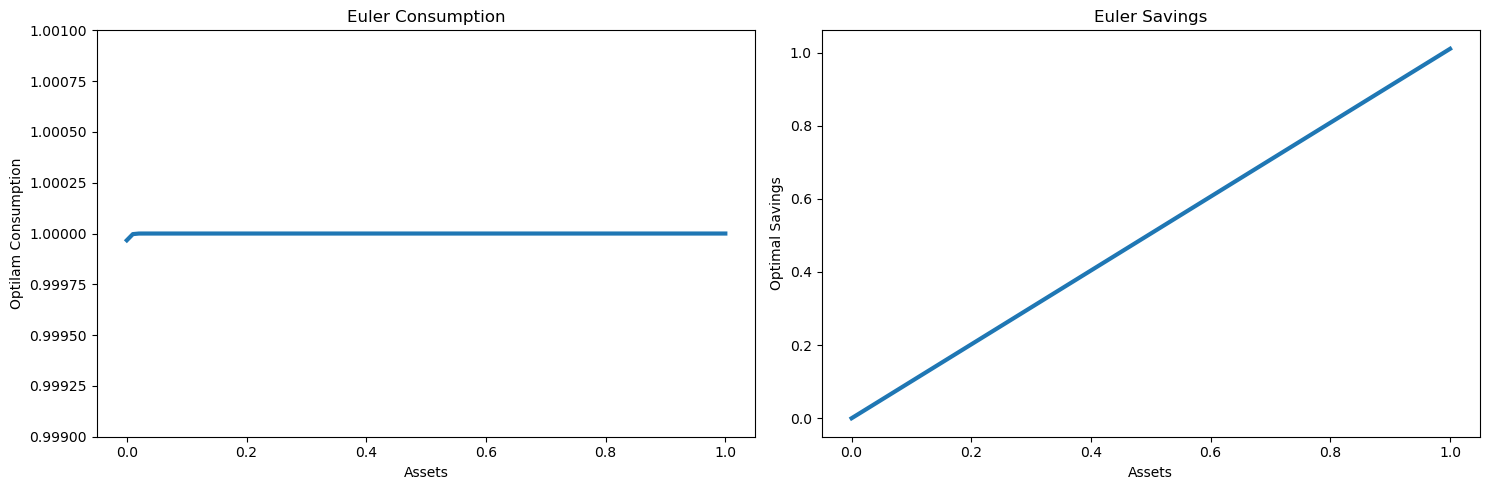

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(a_grid, c_euler, linewidth=3)
axs[0].set_xlabel('Assets')  
axs[0].set_ylabel('Optilam Consumption')  
axs[0].set_title('Euler Consumption')  
axs[0].set_ylim(0.999, 1.001)

axs[1].plot(a_grid, s_euler, linewidth=3)
axs[1].set_xlabel('Assets')  
axs[1].set_ylabel('Optimal Savings')  
axs[1].set_title('Euler Savings')  

plt.tight_layout()
plt.show()

This method usually has the advantage that it operates in policy space rather than value function space. Since policy function has less curvature, is easier to approximate which makes it faster and more accurate.